## Step 3 - Exploring Data

In this step, we will Visualizing and understanding the data

In [1]:
# Step 3 - Exploring Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("IMDb_rating_data_without_nan.csv",index_col = 0)
data.head()

,Name,Genre,ID,Year,Imdb Rating,Director,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
0,The Dark Knight,Action,tt0468569,2008,9.0,Christopher Nolan,"2,556,384",534.86,9.0,"1,476,807",8.7,"264,598"
1,The Lord of the Rings: The Return of the King,Action,tt0167260,2003,9.0,Peter Jackson,"1,777,166",377.85,9.0,"1,027,904",8.9,"218,150"
2,K.G.F: Chapter 2,Action,tt10698680,2022,8.9,Prashanth Neel,"93,320",92.52,8.3,"13,286",7.5,428
3,Everything Everywhere All at Once,Action,tt6710474,2022,8.8,Dan Kwan,"39,711",92.52,8.7,"17,826",8.7,"3,781"
4,Inception,Action,tt1375666,2010,8.8,Christopher Nolan,"2,269,287",292.58,8.8,"1,260,681",8.7,"293,467"


Text(0, 0.5, 'Frequency')

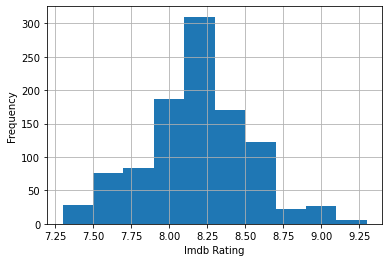

In [3]:
data['Imdb Rating'].hist(bins=10)
plt.xlabel('Imdb Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

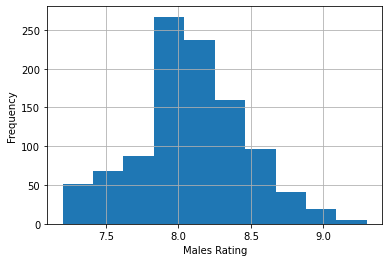

In [4]:
data['malesRating'].hist(bins=10)
plt.xlabel('Males Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

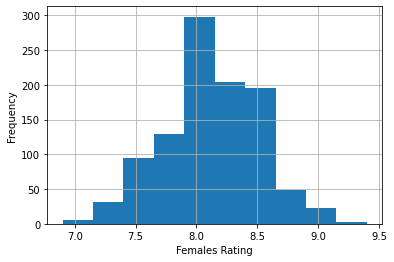

In [5]:
data['femalesRating'].hist(bins=10)
plt.xlabel('Females Rating')
plt.ylabel('Frequency')

In [13]:
## ---------------------------------------------
def plot_frequent_elements(df, df_in_params):
    fig, axes = plt.subplots(1, 2, figsize=(20,5))
    for i, row in df_in_params.iterrows():
        series = get_frequent_elements(df, row.loc['col_name'], row.loc['num_top_elements'])
        one_dim_plot(series, row.loc['plot_type'], axes[i])
## ---------------------------------------------        
def get_frequent_elements(df, col_name, num_top_elements):
    temp_df = df.copy()
    series = temp_df[col_name].value_counts()[:num_top_elements].sort_index(ascending=True)
    return series
## ---------------------------------------------
def one_dim_plot(sr, plot_type, axis):
    sr.plot(kind=plot_type,ax=axis)
## ---------------------------------------------

In [21]:
#df_params = pd.DataFrame({'plot_type': ['line', 'bar'], 
 #                         'col_name': ['Director', 'Name'],
  #                        'num_top_elements': [20,10]})
#plot_frequent_elements(data, df_params)

In [34]:
ct1 = pd.crosstab(data['Genre'],data['Imdb Rating'])
ct1

Imdb Rating,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.2,9.3
Genre,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,0,0,0,0,0,20,3,11,3,4,2,4,1,2,0,0
Adventure,0,0,0,0,0,0,0,0,6,14,8,9,3,3,1,5,0,1,0,0
Animation,0,0,0,0,0,6,6,15,8,4,3,5,2,1,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,14,14,10,3,4,3,0,1,0,0,1,0,0
Comedy,0,0,0,0,0,0,0,0,13,15,9,5,5,1,0,1,0,0,0,1
Crime,0,0,0,0,0,0,0,0,0,15,13,5,4,4,1,0,3,4,1,0
Drama,0,0,0,0,0,0,0,0,0,0,0,3,19,10,3,4,3,5,1,2
Family,0,0,0,0,0,0,11,12,11,5,5,3,1,2,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,15,12,6,3,5,0,4,1,3,0,1,0,0


In [44]:
ct1 = pd.crosstab(data['Genre'],data['malesRating'])
ct1

malesRating,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,...,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.2,9.3
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,0,0,0,2,5,5,...,10,4,2,4,2,5,0,2,0,0
Adventure,0,0,0,0,0,0,0,1,4,4,...,12,4,2,4,1,4,1,1,0,0
Animation,0,0,0,0,1,5,3,13,14,2,...,6,2,2,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,7,14,11,...,4,1,2,0,1,0,0,1,0,0
Comedy,0,0,0,0,0,0,0,2,4,11,...,10,2,4,2,1,0,0,0,1,0
Crime,0,0,0,0,0,0,0,1,3,6,...,13,5,3,3,2,1,0,4,1,0
Drama,0,0,0,0,0,0,0,0,1,1,...,2,2,15,8,5,4,0,6,2,1
Family,0,0,0,0,0,0,7,12,13,5,...,5,2,1,1,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,10,15,5,...,7,0,1,3,1,3,0,1,0,0


In [45]:
ct1 = pd.crosstab(data['Genre'],data['femalesRating'])
ct1

femalesRating,6.9,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,...,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.3,9.4
Genre,,,,,,,,,,,,,,,,,,,,,
Action,1,0,1,1,0,1,0,1,0,4,...,5,5,1,4,1,1,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,1,3,...,8,6,2,4,2,1,0,0,0,0
Animation,0,0,0,0,0,0,0,1,3,6,...,8,2,4,1,1,0,0,0,0,0
Biography,0,0,0,0,0,0,1,2,2,5,...,6,0,1,2,0,0,2,0,0,0
Comedy,1,0,0,0,0,0,0,1,2,1,...,12,5,1,2,0,1,0,0,0,1
Crime,1,0,2,1,1,1,2,3,2,3,...,7,3,2,2,1,3,0,0,0,0
Drama,0,0,0,0,0,1,1,1,0,2,...,8,3,7,8,3,4,2,0,1,1
Family,0,0,0,0,0,0,0,0,2,3,...,11,3,4,1,1,0,0,0,0,0
Fantasy,0,0,0,0,0,1,0,3,0,1,...,6,4,4,4,1,1,0,0,0,0


Text(0, 0.5, '')

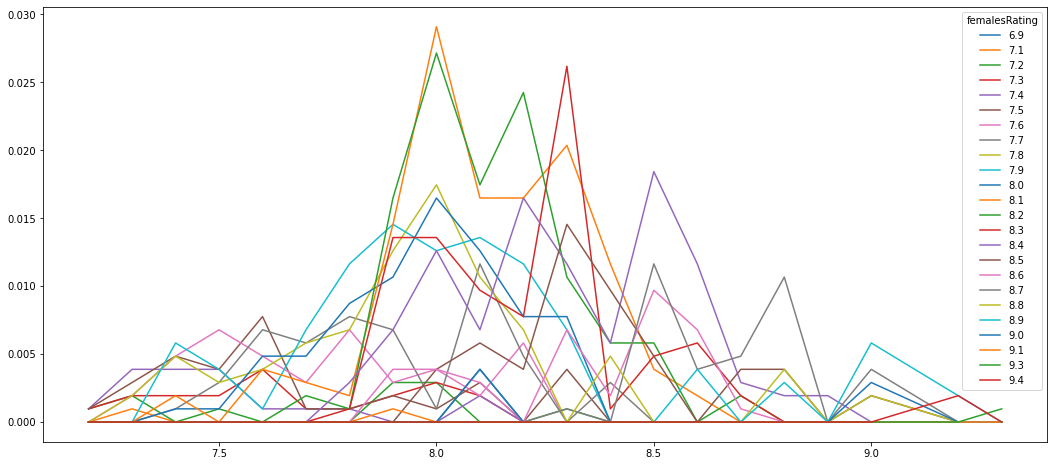

In [58]:
ctab_Dog_Friendly = pd.crosstab(data['malesRating'],data['femalesRating'],normalize=True)
ctab_Dog_Friendly
ctab_Dog_Friendly.plot(kind='line',figsize=(18,8))
plt.title('',fontsize=30)
plt.xlabel('')
plt.ylabel('')

Text(0.5, 1.0, 'Males Rating & Females Rating by Genre')

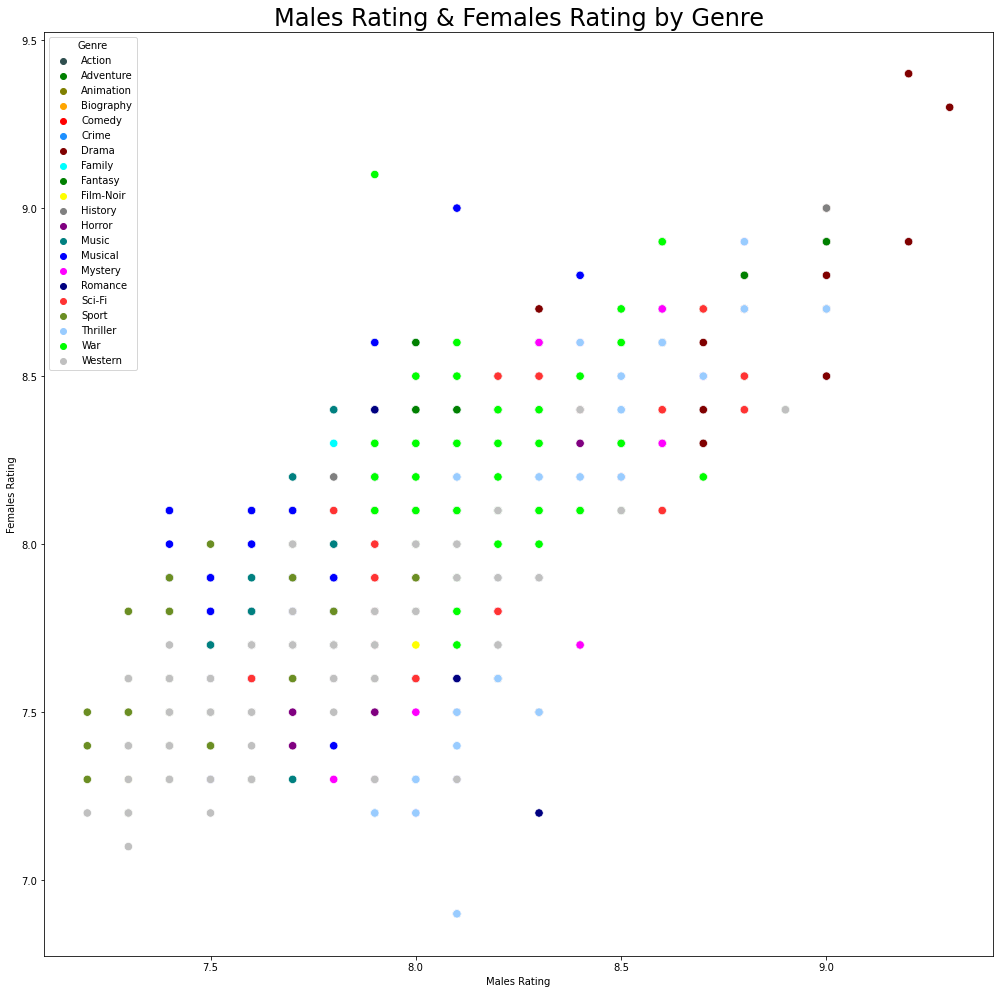

In [88]:
fig = plt.figure(figsize=(17,17))
ax = plt.axes()

color_dict = dict({
                    'Action':'#2F4F4F',
                    'Adventure':'green',
                    'Biography': 'orange',
                    'Comedy': 'red',
                    'Crime': 'dodgerblue',
                    'Thriller' : '#99CCFF',
                    'Sci-Fi' : '#FF3333',
                    'Sport' : '#6B8E23',
                    'War' : '#00FF00',
                    'Musical' : '#0000FF',
                    'Film-Noir' : '#FFFF00',
                    'Family' : '#00FFFF',
                    'Mystery' : '#FF00FF',
                    'Western' : '#C0C0C0',
                    'History' : '#808080', 
                    'Drama' : '#800000', 
                    'Animation' : '#808000',
                    'Fantasy' : '#008000',
                    'Horror' : '#800080', 
                    'Music' : '#008080', 
                    'Romance' : '#000080'
                    })


sns.scatterplot(x= 'Males Rating', y = 'Females Rating',s=70,hue=data['Genre'],palette=color_dict,data={ 'Males Rating': data['malesRating'] , 'Females Rating': data['femalesRating']})
plt.title('Males Rating & Females Rating by Genre',fontsize=24)